In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

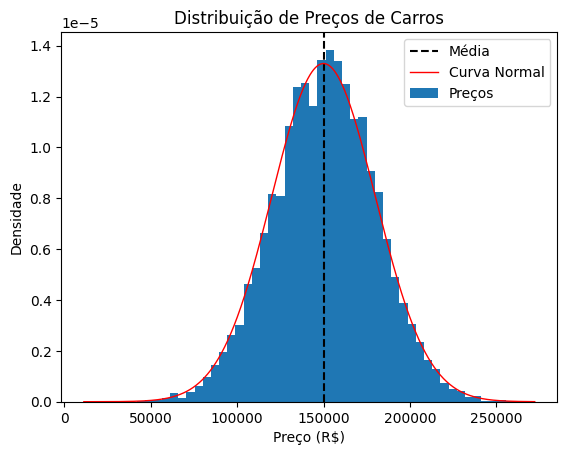

In [10]:
#Criando as variáveis de interesse

#Preço médio do carro Fonte: https://www.infomoney.com.br/consumo/preco-medio-do-carro-0km-chega-a-r-1514-mil-no-brasil-como-fazer-uma-boa-compra/

#Criticar post -> falta de acesso na tabela FIPE https://veiculos.fipe.org.br/

price_mean = 150000 #BRL
price_std = 30000 #BRL

price = np.random.normal(price_mean, price_std, 10000)
plt.hist(price, bins=50, density=True)

xmin, xmax = plt.xlim() # Obtém os limites do eixo x do histograma
x = np.linspace(xmin, xmax, 1000) # Cria um intervalo de valores para a curva
p = norm.pdf(x, price_mean, price_std) # Calcula a PDF da curva normal

plt.axvline(price_mean, color='k', linestyle='--', label='Média')
plt.plot(x, p, 'r', linewidth=1) # Plota a curva em vermelho com espessura 2


plt.title('Distribuição de Preços de Carros')
plt.legend(['Média','Curva Normal', 'Preços'])
plt.xlabel('Preço (R$)')
plt.ylabel('Densidade')
plt.show()


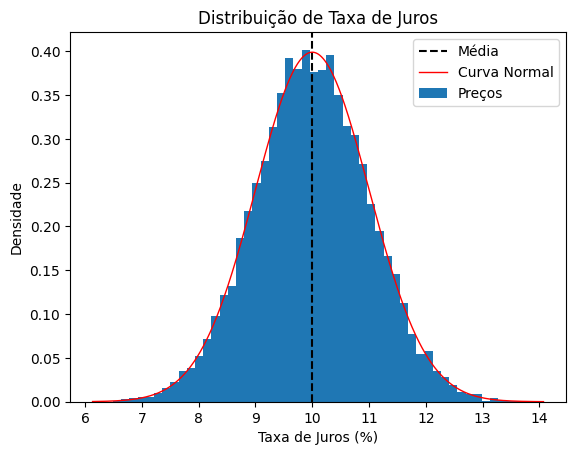

In [11]:
tax_mean = 10 #%
tax_std = 1 #%

tax = np.random.normal(tax_mean, tax_std, 10000)
plt.hist(tax, bins=50, density=True)

xmin, xmax = plt.xlim() # Obtém os limites do eixo x do histograma
x = np.linspace(xmin, xmax, 1000) # Cria um intervalo de valores para a curva
p = norm.pdf(x, tax_mean, tax_std) # Calcula a PDF da curva normal

plt.axvline(tax_mean, color='k', linestyle='--', label='Média')
plt.plot(x, p, 'r', linewidth=1) # Plota a curva em vermelho com espessura 2


plt.title('Distribuição de Taxa de Juros')
plt.legend(['Média','Curva Normal', 'Preços'])
plt.xlabel('Taxa de Juros (%)')
plt.ylabel('Densidade')
plt.show()

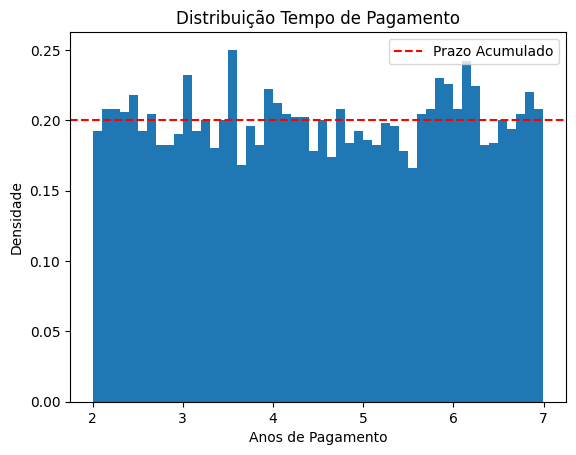

In [12]:
term_max = 7 #Anos
term_min = 2 #Anos

term = np.random.uniform(term_min, term_max, (term_max-term_min)*1000)
counts, bins, patches = plt.hist(term, bins=50, density=True)


y_mean = np.mean(counts)
plt.axhline(y=y_mean, color='red', linestyle='--', label=f'Média do eixo y ({y_mean:.2f})')


plt.title('Distribuição Tempo de Pagamento')
plt.legend(['Prazo Acumulado'])
plt.xlabel('Anos de Pagamento')
plt.ylabel('Densidade')

plt.show()

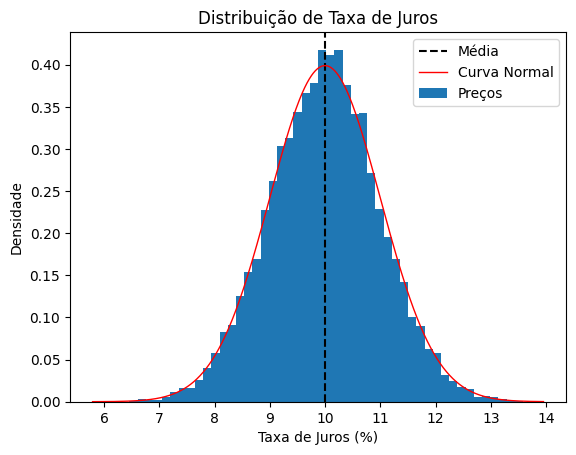

In [13]:
entry_mean = 10 #%
entry_std = 1 #%

entry = np.random.normal(entry_mean, entry_std, 10000)
plt.hist(entry, bins=50, density=True)

xmin, xmax = plt.xlim() # Obtém os limites do eixo x do histograma
x = np.linspace(xmin, xmax, 1000) # Cria um intervalo de valores para a curva
p = norm.pdf(x, entry_mean, entry_std) # Calcula a PDF da curva normal

plt.axvline(entry_mean, color='k', linestyle='--', label='Média')
plt.plot(x, p, 'r', linewidth=1) # Plota a curva em vermelho com espessura 2


plt.title('Distribuição de Taxa de Juros')
plt.legend(['Média','Curva Normal', 'Preços'])
plt.xlabel('Taxa de Juros (%)')
plt.ylabel('Densidade')
plt.show()

Variáveis de interesse:

- Preço do Carro (R$) - Normal média 150k desvio padrão 10000
- Taxa de Juros - Normal com média 10% desvio padrão 1%
- Prazo (anos) - Uniforme 2 a 7 anos
- Tipo de Amortização 
- Valor de Entrada
- Parcela da amortização = Preço do Carro - Entrada / Prazo * 12 

In [14]:
###### TRY E CATCH PARA GERAÇÃO DE VARIÁVEIS ALEATÓRIAS SEM SENTIDO FÍSICO #######
var_min = {
      'Preço Médio': min(price)
    , 'Taxa de Juros': min(tax)
    , 'Prazo de Financiamento': min(term) #essa sempre vai ser maior que 0 pois é limitada no inferior
    , 'Entrada' : min(entry)
    }

In [15]:
var_continuacao_programa = False
try:
    for chave in var_min.keys():
        if not isinstance(var_min[chave],(int,float)) or var_min[chave] <= 0:
            raise ValueError
except ValueError:
    print(f'Variável {chave} com valor {var_min[chave]} ou tipo {type(var_min[chave])} não suportado na distribuição')
else:
    print('Variáveis validadas com sucesso:' + str(var_min.keys()))
    var_continuacao_programa = True

    
    

Variáveis validadas com sucesso:dict_keys(['Preço Médio', 'Taxa de Juros', 'Prazo de Financiamento', 'Entrada'])


In [16]:
def monte_carlo(price, tax, term, entry, n_simulacoes, seed):
    #random_number = 
    print(price.mean())
    print(tax.mean())
    print(term.mean())
    print(entry.mean())
    print(n_simulacoes)
    print(seed)

In [78]:
if var_continuacao_programa != True:
    print('Problema encontrado nas variáveis de entrada. Corrija-os antes de continuar.')
else:
    print('Iniciando simulação de Monte Carlo')
    n_simulacoes = 100000 
    seed = 202419
    monte_carlo(price, tax, term, entry, n_simulacoes,seed)
    print(price_idx)

print(price[price_idx])

Iniciando simulação de Monte Carlo
8565
160284.81307903692


In [ ]:
def monte_carlo(price, tax, term, entry, n_simulacoes,seed):
    np.random.seed(seed=seed)
    for _ in range(0,n_simulacoes+1):
        price_idx = np.random.randint(low=0,high=price.shape[0])
        tax_idx = np.random.randint(low=0,high=tax.shape[0])
        term_idx = np.random.randint(low=0,high=term.shape[0])
        entry_idx = np.random.randint(low=0,high=entry.shape[0])
    return price_idx, tax_idx, term_idx, entry_idx